In [1]:
from sklearn.datasets import make_blobs
X,Y = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=6, random_state=11)
                                 

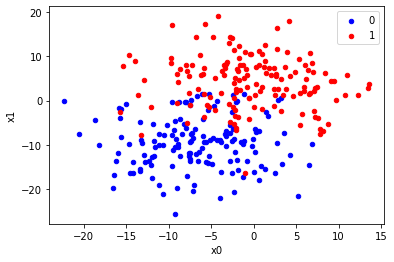

In [2]:
from matplotlib import pyplot as plt
from pandas import DataFrame
df = DataFrame(dict(x=X[:,0], y=X[:,1], label= Y))
colors = {0:'blue', 1:'red'}
fig, ax = plt.subplots()
grouped= df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind = 'scatter', x='x', y='y',label = key, color = colors[key])
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [4]:
#Min-Max Scaling
import numpy as np
def min_max_scaling(S):
    x1_min = min(X[:,0])
    x1_max = max(X[:,0])
    
    f = lambda x: (x - x1_min)/(x1_max - x1_min)
    S[:,0] = f(S[:,0])

    x2_min = min(X[:,1])
    x2_max = max(X[:,1])
    
    f = lambda x: (x - x2_min)/(x2_max - x2_min)
    S[:,1] = f(S[:,1])
    
    return S

array([0, 0])

In [5]:
x = min_max_scaling(X)
print(X[0:5])

[[0.59987983 0.70438379]
 [0.22476575 0.2065585 ]
 [0.42582798 0.14400726]
 [0.60646637 0.58589566]
 [0.35477231 0.56762558]]


In [7]:
#Find k-neighbours
def find_k_neighbors(k,X,test_point):
    neighbors = []
    for i in range(len(X)):
        dist = np.sqrt(sum(np.square(X[i]-test_point)))
        neighbors.append([i,dist])
    neighbors = sorted(neighbors, key = lambda x : x[1])
    return neighbors[0:k]

new_points = np.array([[-10, -10],
                      [0, 10],
                      [-15, 10],
                      [5, -2]])

new_points = min_max_scaling(new_points)
knn = find_k_neighbors(4, X, new_points[1])
print(knn)

[[253, 9.014048181254076], [166, 9.051725877360226], [132, 9.05198796185626], [39, 9.05379236453155]]


In [8]:
#Get the most common class from the neighbors
from collections import Counter
def KNN_Classify(neighbors):
    y_class = [Y[i[0]] for i in neighbors]
    return Counter(y_class).most_common(1)[0][0]

In [12]:
print(new_points[1] ,"data point belongs to class", KNN_Classify(knn))

[ 0 10] data point belongs to class 1


In [36]:
#KNN for regression
from sklearn.datasets import make_regression
X, Y = make_regression(n_samples=300, n_features=2, n_informative=2, noise=3, bias=20, random_state=11)

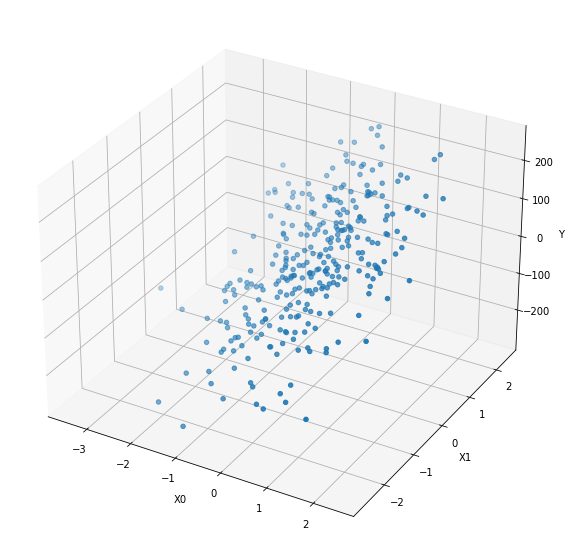

In [40]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

In [38]:
def knn_regressor(neighbors):
    y_val = [Y[i[0]] for i in neighbors]
    avg_y = np.mean(y_val)
    return avg_y


In [39]:
new_points = np.array([[-1, 1],
                      [0, 2],
                      [-3, -2],
                      [3, -3]])

knn = find_k_neighbors(4, X, new_points[1])
knn_regressor(knn)

186.16913394091506